In [18]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


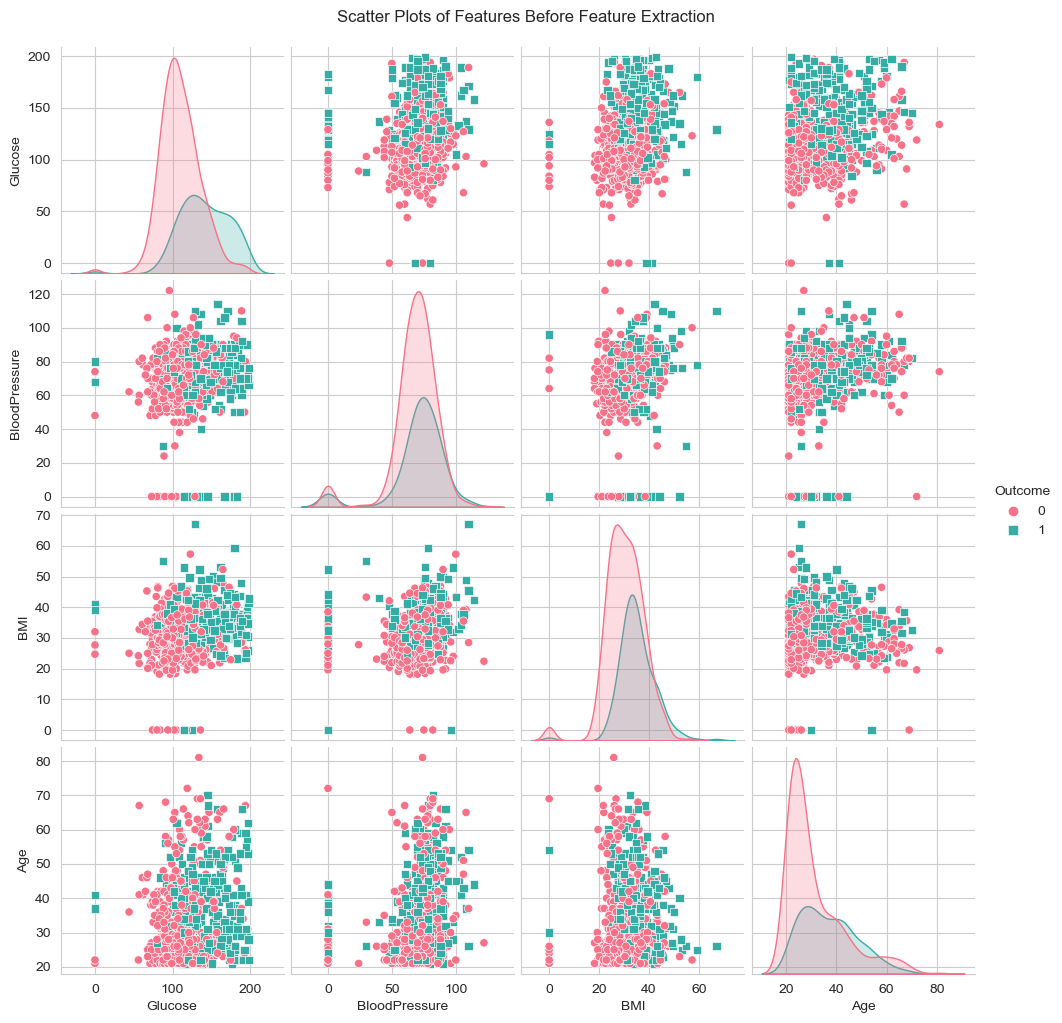

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create a pair plot to visualize the relationships between some of the features
selected_features = ["Glucose", "BloodPressure", "BMI", "Age", "Outcome"]
sns.pairplot(data[selected_features], hue="Outcome", palette="husl", markers=["o", "s"])

plt.suptitle('Scatter Plots of Features Before Feature Extraction', y=1.02)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
import numpy as np

# Splitting the dataset into training and test sets
X = data.drop('Outcome', axis=1).values
y = data['Outcome'].values

# Convert 0 labels to -1 for perceptron implementation
y[y == 0] = -1

# Splitting the data: 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perceptron implementation
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Store misclassifications to visualize performance later
        self.misclassified_ = []

        # Training loop
        for _ in range(self.n_iters):
            misclassified = 0
            for idx, xi in enumerate(X):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Update weights and bias if prediction is wrong
                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * xi
                self.bias += update
                
                # Count misclassifications
                misclassified += int(update != 0.0)
            self.misclassified_.append(misclassified)

        return self

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, -1)

# Train the perceptron
p = Perceptron(learning_rate=0.001, n_iters=1000)
p.fit(X_train, y_train)

# Test the perceptron
y_pred = p.predict(X_test)
accuracy = np.mean(y_test == y_pred)

accuracy

0.7077922077922078

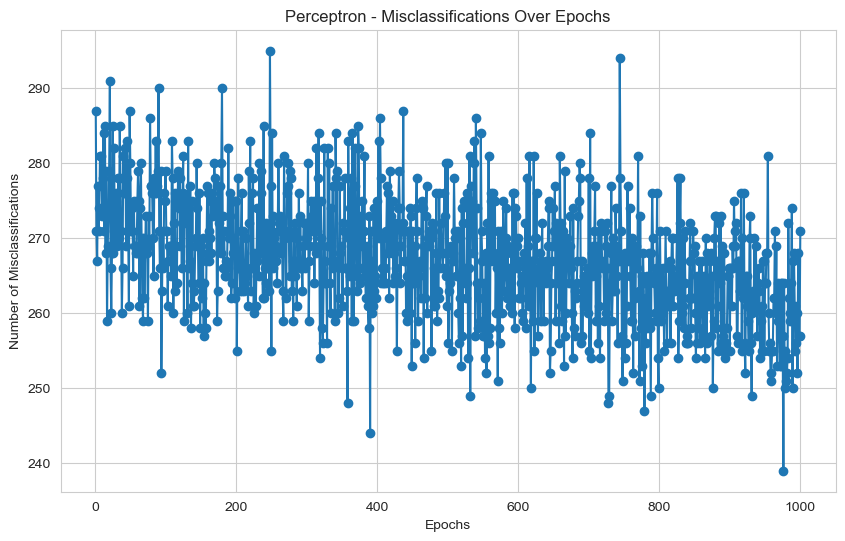

In [22]:
# Plotting the misclassifications over epochs
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(p.misclassified_) + 1), p.misclassified_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.title('Perceptron - Misclassifications Over Epochs')
plt.grid(True)
plt.show()

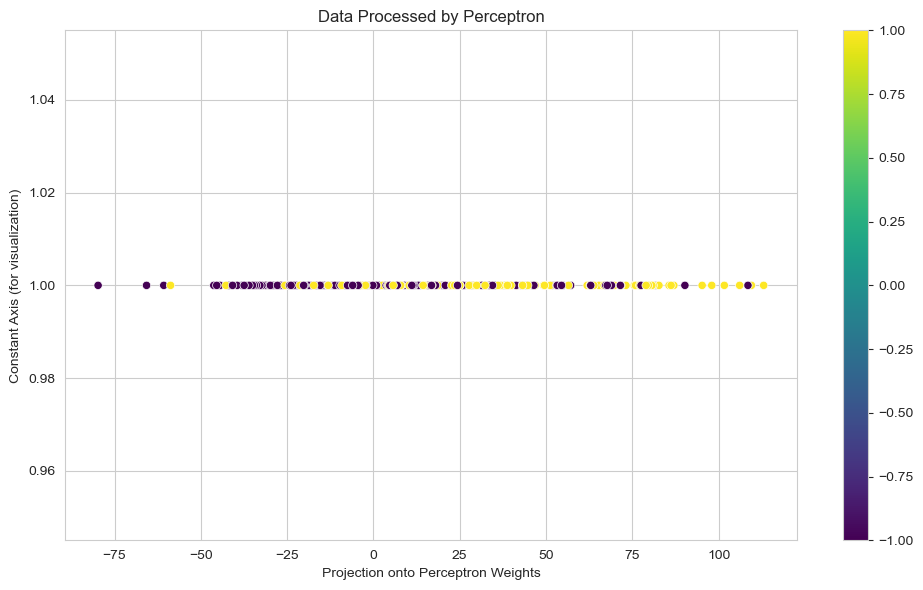

In [23]:
# Projecting data onto the line defined by the Perceptron's weights
projection = np.dot(X, p.weights)

# Plotting the projected data
plt.figure(figsize=(10, 6))
plt.scatter(projection, [1] * len(projection), c=y, cmap="viridis", marker='o', edgecolors='w', linewidth=0.5)
plt.colorbar()
plt.xlabel('Projection onto Perceptron Weights')
plt.ylabel('Constant Axis (for visualization)')
plt.title('Data Processed by Perceptron')
plt.grid(True)
plt.tight_layout()
plt.show()